          Latitude   Longitude        DBH  Tree_Height  \
Plot_ID                                                  
1        24.981605 -117.040695  29.862040    20.835684   
2        48.028572  -92.066934  28.462986    24.307079   
3        39.279758  -68.893791  91.094185     9.013101   
4        33.946339  -78.744258  28.706889    19.496475   
5        16.240746  -73.540720  30.835224    18.008888   
...            ...         ...        ...          ...   
996      13.663283  -84.013139  87.203097    14.378997   
997      46.692543  -63.036977  19.940955    11.363233   
998      15.472745 -125.172939  34.429847    13.048025   
999      48.009494 -126.006170  32.554326    16.838336   
1000     27.840231 -110.246905  87.784333     6.518286   

         Crown_Width_North_South  Crown_Width_East_West      Slope  \
Plot_ID                                                              
1                       6.147963               4.542720  29.171563   
2                       8.248891   

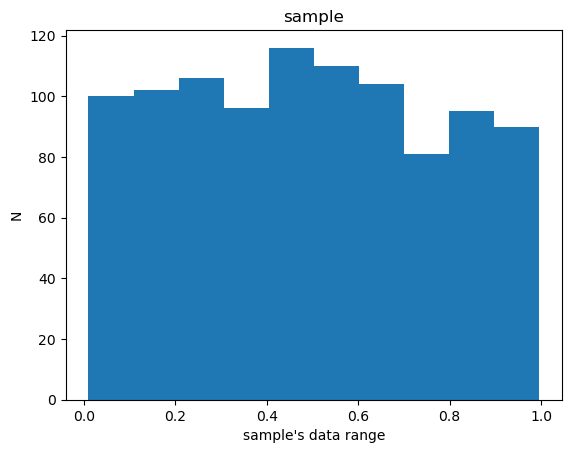

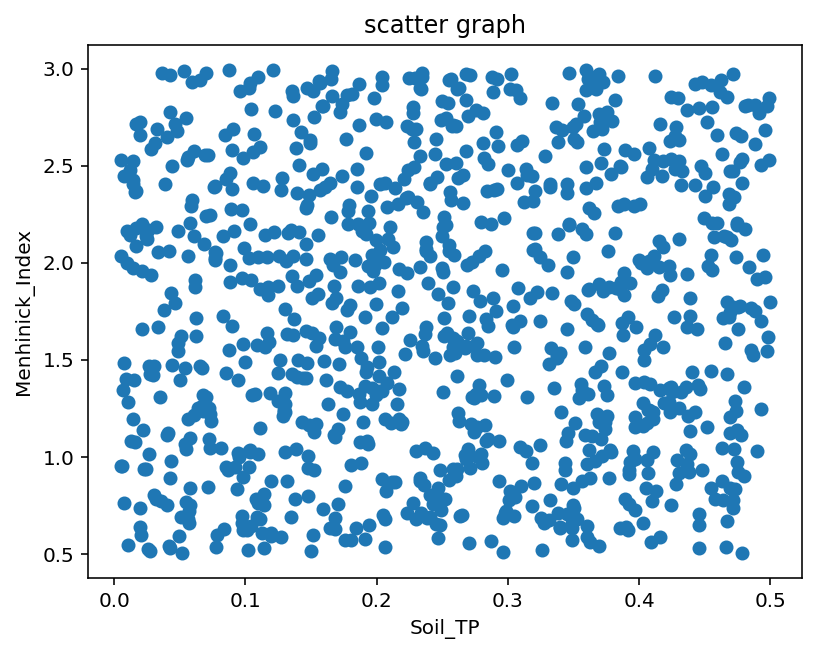

                         Latitude  Longitude   DBH  Tree_Height  \
Latitude                     1.00       0.03  0.01        -0.03   
Longitude                    0.03       1.00  0.03        -0.01   
DBH                          0.01       0.03  1.00        -0.01   
Tree_Height                 -0.03      -0.01 -0.01         1.00   
Crown_Width_North_South      0.03       0.03 -0.01        -0.04   
Crown_Width_East_West       -0.06       0.03 -0.02         0.04   
Slope                        0.03       0.04 -0.03        -0.02   
Elevation                   -0.03       0.05 -0.05        -0.02   
Soil_TN                     -0.04       0.00 -0.01         0.03   
Soil_TP                      0.06      -0.07  0.01         0.00   
Soil_AP                     -0.01       0.01  0.08         0.04   
Soil_AN                      0.02       0.02  0.06        -0.02   
Menhinick_Index             -0.01       0.04 -0.03        -0.08   
Gleason_Index               -0.02       0.02 -0.01        -0.0

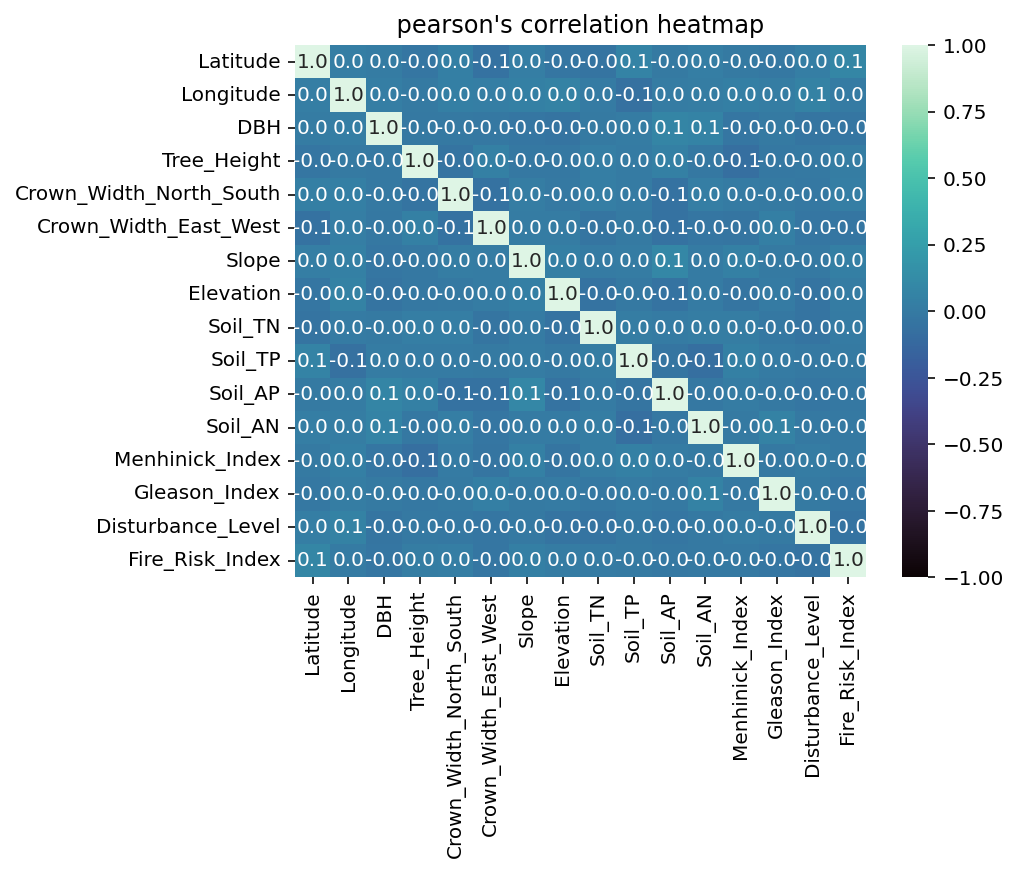

In [13]:
# import libraries
import pandas  as pd
import seaborn as sns
import scipy   as sc
import matplotlib.pyplot as plt

def func_cat(sample):
    """
    This function plots histogram of
    sample data
    """
    # plot histogram
    plt.hist(sample)

    # label x axis
    plt.xlabel("sample's data range")

    # lable y axis
    plt.ylabel("N")
    
    # set title for plot
    plt.title("sample")
    
    # show the plot
    plt.show()
    
    return


def func_rel(x, y1):
    """
    This function plots the relational
    graph between x and y
    """
    # setting dpi = 144 for better resolution
    plt.figure(dpi = 144)

    # plot the scatter graph
    plt.scatter(x, y1)

    # set label for x axis
    plt.xlabel("Soil_TP")

    # set label for y axis
    plt.ylabel("Menhinick_Index")

    # set plot title
    plt.title("scatter graph")

    # show the plot
    plt.show()
    
    return


def fun_stat(method):
    """
    This function plots the heatmap
    """
    # set the dpi for better resolution
    plt.figure(dpi = 144)

    # plot the heatmap
    sns.heatmap(df.corr(method = method, numeric_only = True), 
    vmin = -1, vmax = +1, annot = True, fmt = ".1f", cmap = "mako")

    # add title to plot
    plt.title(f" {method}'s correlation heatmap ")
    
    return
    

def show_ststs():
    """
    This function shows the dataset,
    mean, standard deviaton, skewness 
    and kurtosis 
    """
    # print dataframe
    print(df)  
    
    # print dataframe.describe
    print( df.describe() )

    # print the skewness
    print("\nskewness \t value")

    # extract data from dataset to caluclate skewness
    c = df.columns

    # iterate over each column to caluclate skewness
    for s in c:
        
        # do not consider the charecter value columns
        if s != "Health_Status":
            
            # caluclate the skewness 
            skewness = sc.stats.skew(df[s], axis = 0, bias = True)
            
            # print the skewness
            print( f"{s} \t {skewness}")
    
    # print kurtosis
    print("\nkurtosis \t value")
    
    # iterate over each column to caluclate kurtosis
    for x in c:

        # do not consider the charecter value columns
        if x != "Health_Status":
            
            # caluclate the kurtosis
            kurt = sc.stats.kurtosis(df[x], axis = 0, bias = True)
            
            #print kurtosis
            print( f"{x} \t {kurt}" )
    
    return

# read the csv file
df = pd.read_csv("forest_health_data.csv", index_col = "Plot_ID")

# call the function to show dataframe stats
show_ststs()

# preparing values to plot for x axis
x = df["Soil_TP"]

# preparing values to plot for y axis to plot on categorical graph
y = df["Soil_TN"]

# preparing data for y axis to plot on relational graph
y1 = df["Menhinick_Index"]

# call the function to plot histogram
func_cat(y)

# call the function to plot scatter graph
func_rel(x, y1)

# caluclate correlation matrix print it
corr_mat = round(df.corr(numeric_only = True), 2)

# print correlation matrix
print(corr_mat)

# call the function to plot heatmap of pearson and kendell coefficient
fun_stat("pearson")